In [1]:
import pandas as pd

# example: load USvideos.csv
df = pd.read_csv("USvideos.csv", encoding="latin1")
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [2]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 48
Duplicates after: 0


In [3]:
print(df.isnull().sum())


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               569
dtype: int64


In [4]:
df['description'] = df['description'].fillna("No Description")


In [5]:
df['tags'] = df['tags'].fillna("No Tags")
df['description'] = df['description'].fillna("No Description")


In [6]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [7]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')


In [8]:
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_month'] = df['publish_time'].dt.month


In [9]:
df = df[df['views'] > 0]  # remove broken rows
df = df[df['likes'] <= df['views']]  # likes can't exceed views


In [10]:
# 1. Fix trending_date format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# 2. Convert publish_time
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# 3. Ensure numeric columns are integers
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 4. Feature extraction
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_month'] = df['publish_time'].dt.month


In [11]:
print(df_us_clean.shape)
print(df_us_clean.info())
print(df_us_clean.describe())


NameError: name 'df_us_clean' is not defined

In [ ]:
import pandas as pd

# 1. Load dataset
df_us = pd.read_csv("I:/youtube/USvideos.csv", encoding="latin1")

# 2. Remove duplicates
print("Duplicates before:", df_us.duplicated().sum())
df_us = df_us.drop_duplicates()
print("Duplicates after:", df_us.duplicated().sum())

# 3. Handle missing values
print("\nMissing values before:\n", df_us.isnull().sum())

# Drop rows where 'description' is missing (optional, can also fill with "")
df_us['description'] = df_us['description'].fillna("")

print("\nMissing values after:\n", df_us.isnull().sum())

# 4. Save cleaned dataset
output_path = "I:/youtube/USvideos_clean.csv"
df_us.to_csv(output_path, index=False, encoding="utf-8")

print(f"\n✅ Cleaned dataset saved to: {output_path}")


In [ ]:
df_us_clean = pd.read_csv("I:/youtube/USvideos_clean.csv")
df_us_clean.head()


In [ ]:
!pip install matplotlib seaborn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40901 entries, 0 to 40900
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21024\4075958067.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")


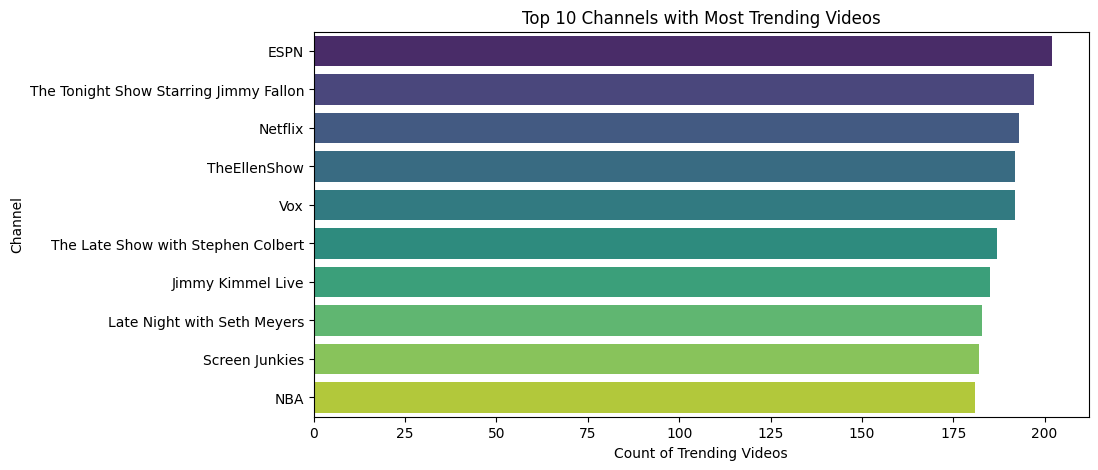

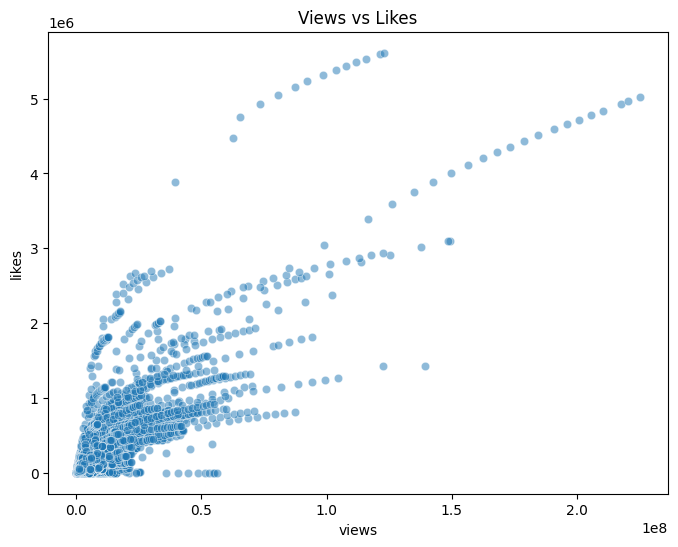

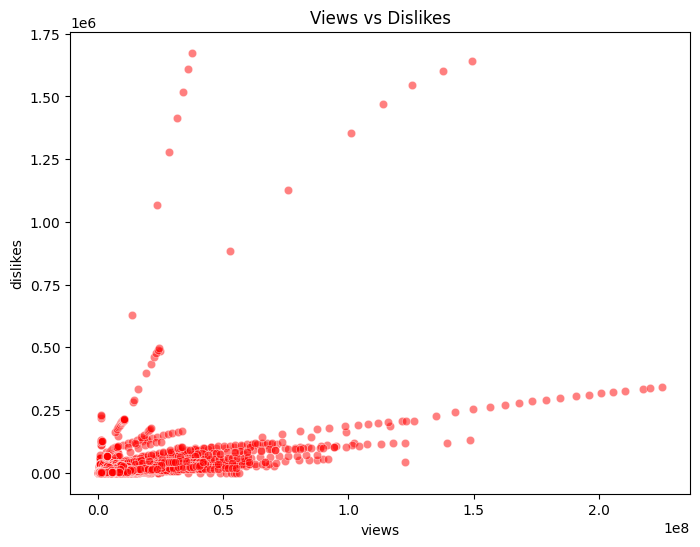

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21024\4075958067.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_likes.index, y=avg_likes.values, palette="coolwarm")


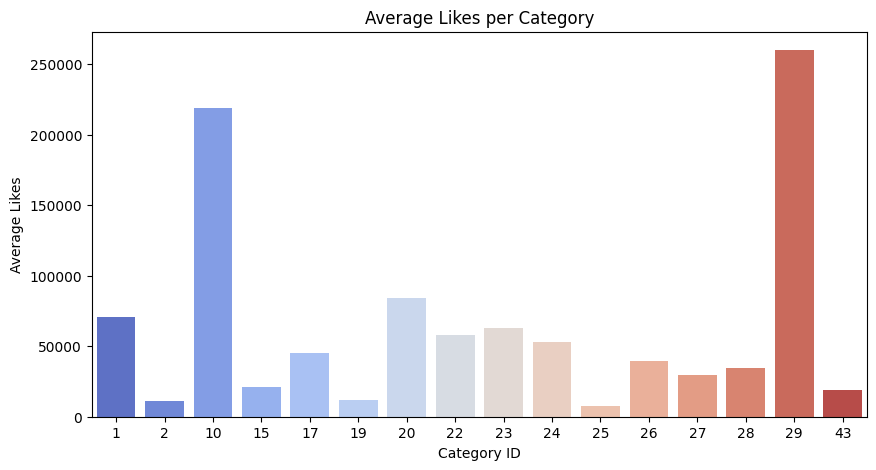

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned file
df_us_clean = pd.read_csv("I:/youtube/USvideos_clean.csv")

# 1. Quick overview
print(df_us_clean.info())
print(df_us_clean.describe())

# 2. Top 10 videos by views
top_videos = df_us_clean.nlargest(10, "views")[["title", "channel_title", "views"]]
print(top_videos)

# 3. Top 10 channels with most videos trending
top_channels = df_us_clean["channel_title"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")
plt.title("Top 10 Channels with Most Trending Videos")
plt.xlabel("Count of Trending Videos")
plt.ylabel("Channel")
plt.show()

# 4. Relationship between views, likes, and dislikes
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_us_clean, x="views", y="likes", alpha=0.5)
plt.title("Views vs Likes")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_us_clean, x="views", y="dislikes", alpha=0.5, color="red")
plt.title("Views vs Dislikes")
plt.show()

# 5. Average likes per category
avg_likes = df_us_clean.groupby("category_id")["likes"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_likes.index, y=avg_likes.values, palette="coolwarm")
plt.title("Average Likes per Category")
plt.xlabel("Category ID")
plt.ylabel("Average Likes")
plt.show()


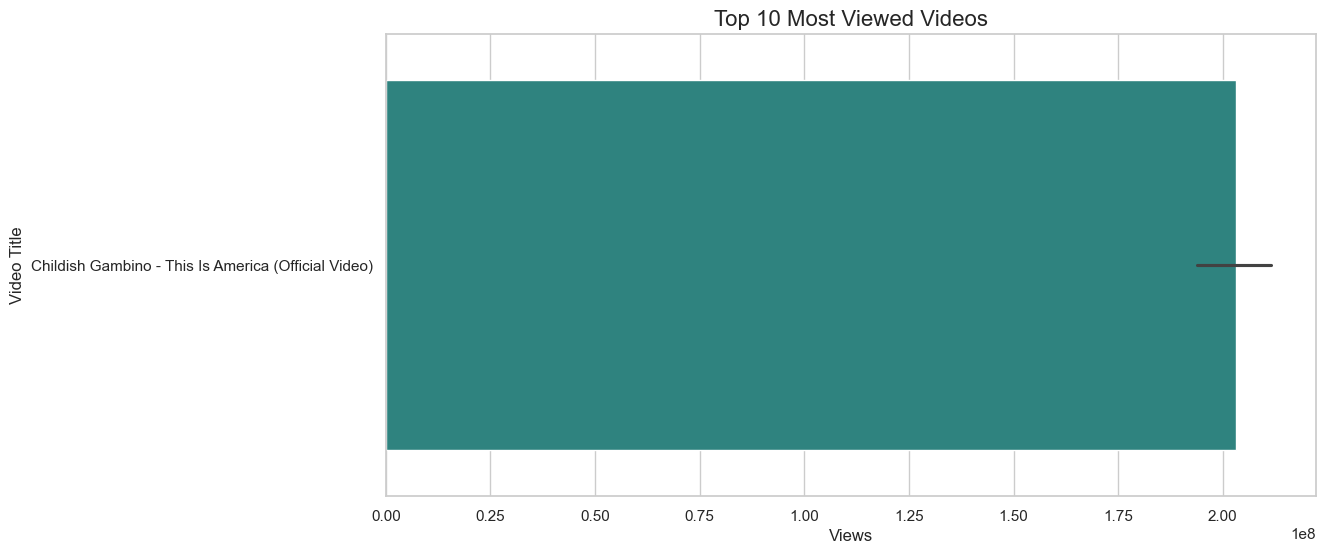

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("I:/youtube/USvideos_clean.csv")

# Set a style for seaborn
sns.set(style="whitegrid")

# 1. Top 10 most viewed videos
top10_views = df.nlargest(10, "views")
plt.figure(figsize=(12,6))
sns.barplot(x="views", y="title", data=top10_views, hue="title", dodge=False, palette="viridis", legend=False)
plt.title("Top 10 Most Viewed Videos", fontsize=16)
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21024\3823416611.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="views", y="title", data=top10_views, palette="viridis")


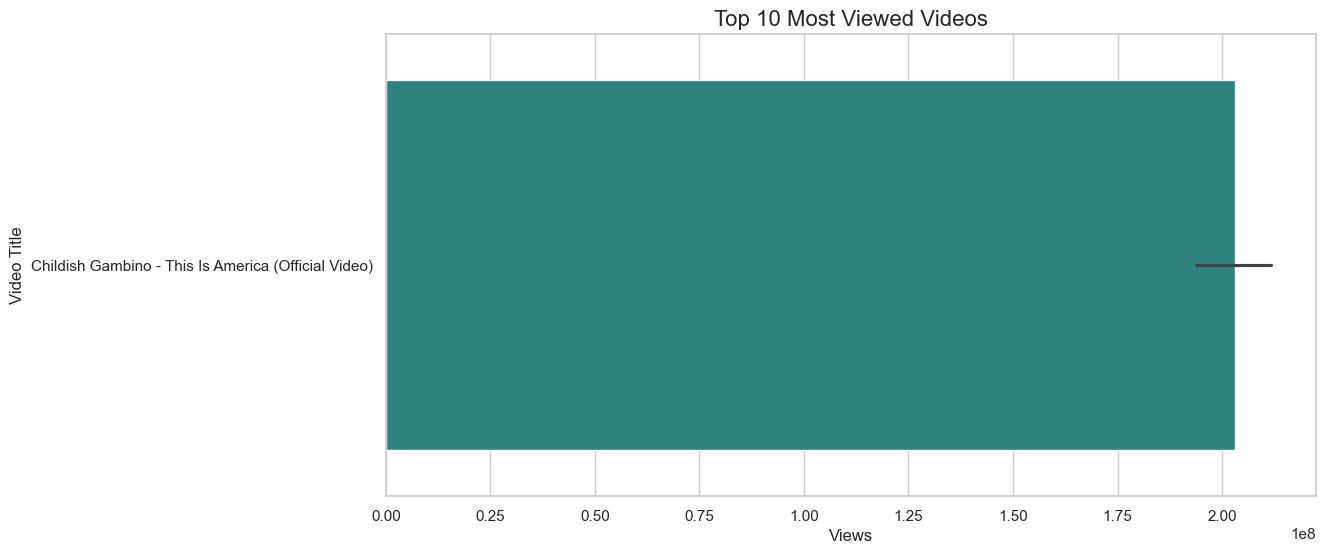

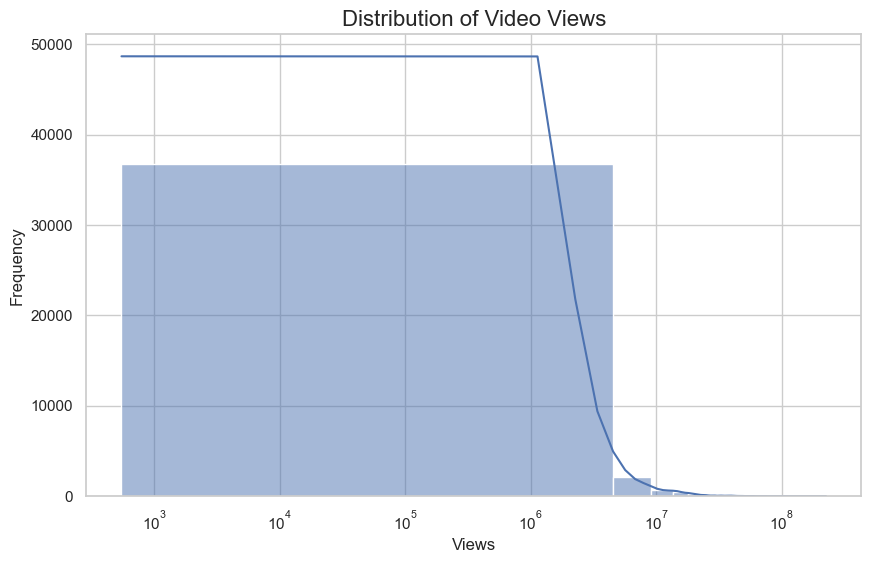

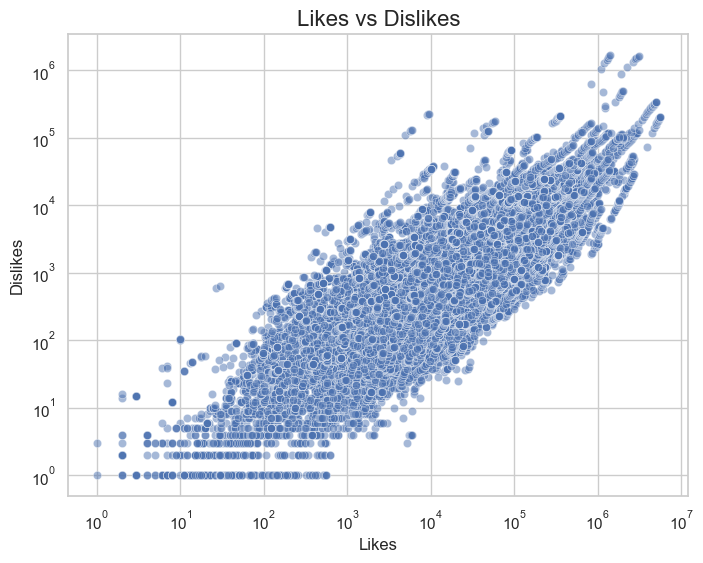

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21024\3823416611.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="magma")


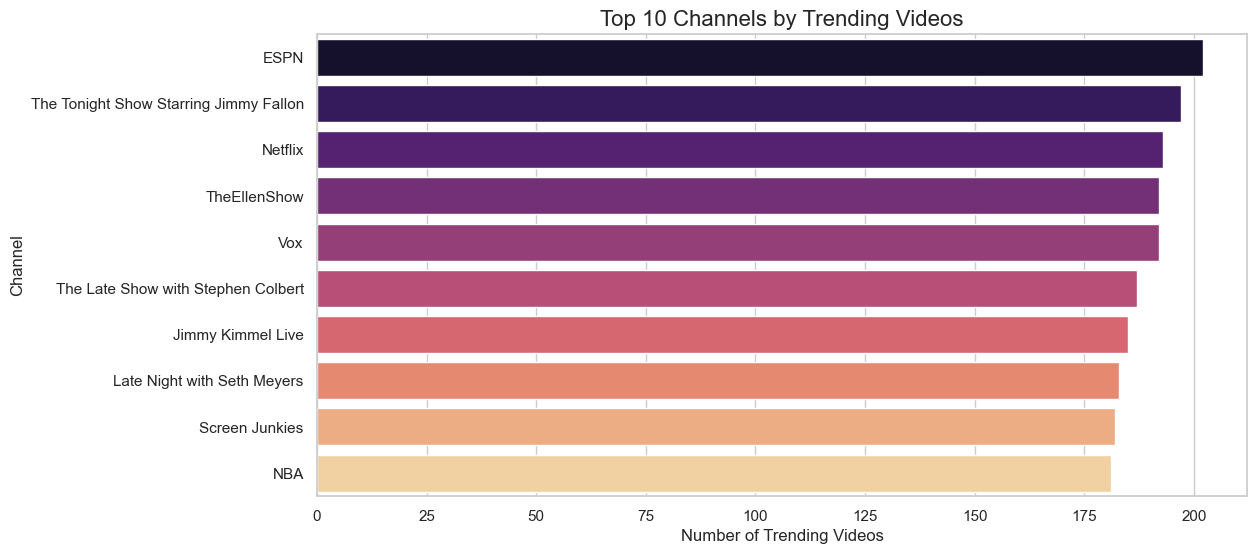

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("I:/youtube/USvideos_clean.csv")

# Set a style for seaborn
sns.set(style="whitegrid")

# 1. Top 10 most viewed videos
top10_views = df.nlargest(10, "views")
plt.figure(figsize=(12,6))
sns.barplot(x="views", y="title", data=top10_views, palette="viridis")
plt.title("Top 10 Most Viewed Videos", fontsize=16)
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

# 2. Distribution of video views
plt.figure(figsize=(10,6))
sns.histplot(df["views"], bins=50, kde=True)
plt.title("Distribution of Video Views", fontsize=16)
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.xscale("log")   # scale because views vary a lot
plt.show()

# 3. Likes vs Dislikes relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x="likes", y="dislikes", data=df, alpha=0.5)
plt.title("Likes vs Dislikes", fontsize=16)
plt.xlabel("Likes")
plt.ylabel("Dislikes")
plt.xscale("log")
plt.yscale("log")
plt.show()

# 4. Most popular channels by number of trending videos
top_channels = df["channel_title"].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="magma")
plt.title("Top 10 Channels by Trending Videos", fontsize=16)
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel")
plt.show()



In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load category mapping
with open("US_category_id.json", "r") as f:
    data = json.load(f)

# Create dictionary: {id: title}
category_mapping = {int(item["id"]): item["snippet"]["title"] for item in data["items"]}

# Now map in your dataframe
df["category_name"] = df["category_id"].map(category_mapping)

# Group and plot
likes_per_category = df.groupby("category_name")["likes"].mean().sort_values(ascending=False)

likes_per_category.plot(kind="bar", figsize=(12,6), color="skyblue")
plt.title("Average Likes per Category")
plt.ylabel("Average Likes")
plt.xticks(rotation=45, ha="right")
plt.show()


NameError: name 'df' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by views and take top 10
top_videos = df.sort_values("views", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_videos,
    x="views",
    y="title",
    palette="viridis"
)

plt.title("Top 10 Most Viewed Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()



NameError: name 'df' is not defined

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by views and take top 10
top_videos = df.nlargest("views", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_videos,
    x="views",
    y="title",
    palette="viridis"
)

plt.title("Top 10 Most Viewed Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()



NameError: name 'df' is not defined

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15652\3823416611.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="views", y="title", data=top10_views, palette="viridis")


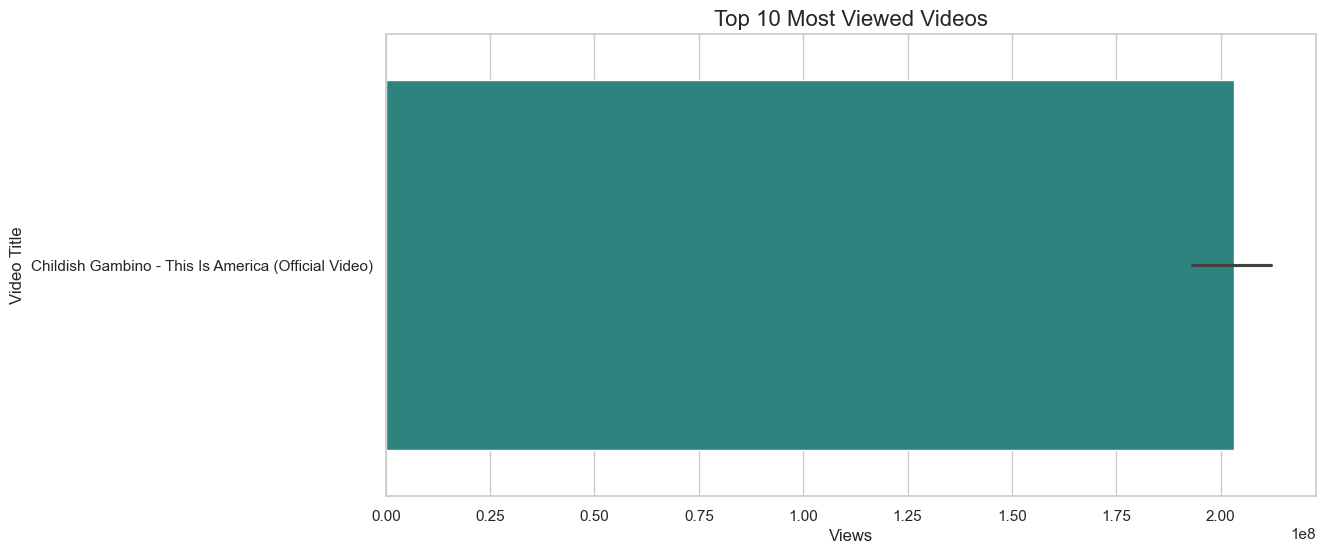

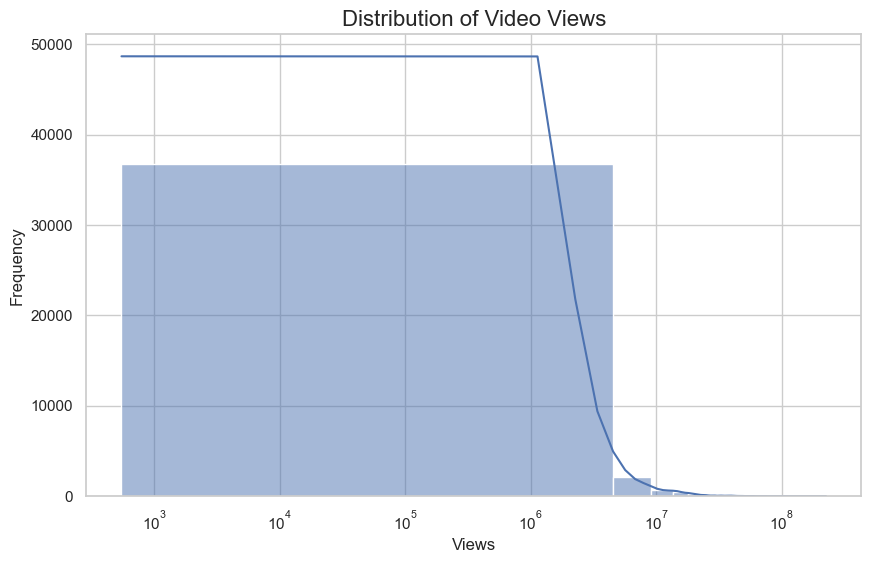

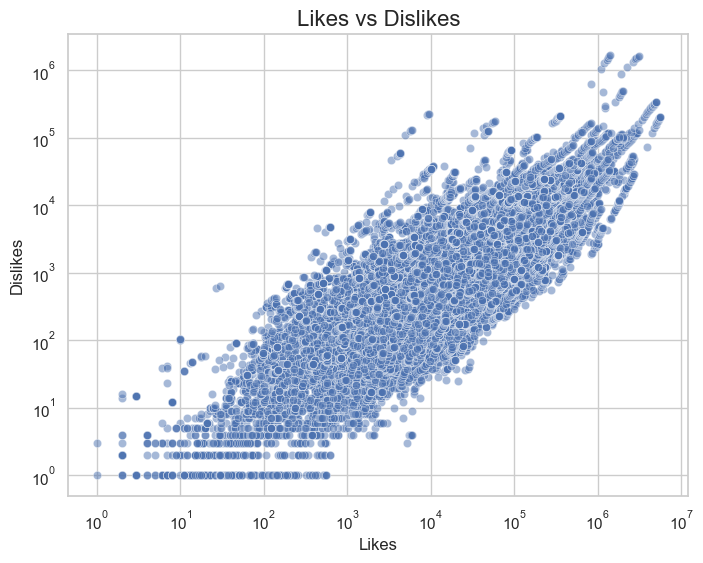

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15652\3823416611.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="magma")


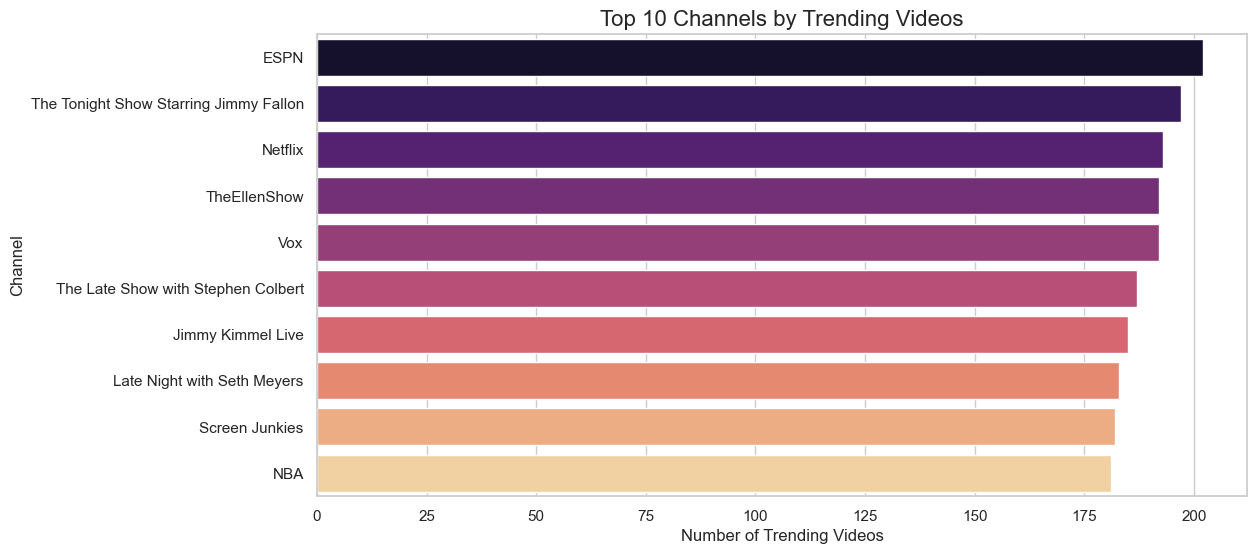

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("I:/youtube/USvideos_clean.csv")

sns.set(style="whitegrid")


top10_views = df.nlargest(10, "views")
plt.figure(figsize=(12,6))
sns.barplot(x="views", y="title", data=top10_views, palette="viridis")
plt.title("Top 10 Most Viewed Videos", fontsize=16)
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df["views"], bins=50, kde=True)
plt.title("Distribution of Video Views", fontsize=16)
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.xscale("log")   # scale because views vary a lot
plt.show()


plt.figure(figsize=(8,6))
sns.scatterplot(x="likes", y="dislikes", data=df, alpha=0.5)
plt.title("Likes vs Dislikes", fontsize=16)
plt.xlabel("Likes")
plt.ylabel("Dislikes")
plt.xscale("log")
plt.yscale("log")
plt.show()

top_channels = df["channel_title"].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="magma")
plt.title("Top 10 Channels by Trending Videos", fontsize=16)
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel")
plt.show()

